In [26]:
dataset_metadata = {
    "monash_tourism_monthly": {"prediction_length": 24},
    "m4_hourly": {"prediction_length": 48},
}

dataset_choice = "monash_tourism_monthly"
num_time_series_subset = 2

In [27]:
from datasets import load_dataset
from tabpfn_time_series import TimeSeriesDataFrame
from tabpfn_time_series.data_preparation import to_gluonts_univariate, generate_test_X

prediction_length = dataset_metadata[dataset_choice]["prediction_length"]
dataset = load_dataset("autogluon/chronos_datasets", dataset_choice)

tsdf = TimeSeriesDataFrame(to_gluonts_univariate(dataset["train"]))
tsdf = tsdf[
    tsdf.index.get_level_values("item_id").isin(tsdf.item_ids[:num_time_series_subset])
]
train_tsdf, test_tsdf_ground_truth = tsdf.train_test_split(
    prediction_length=prediction_length
)
test_tsdf = generate_test_X(train_tsdf, prediction_length)

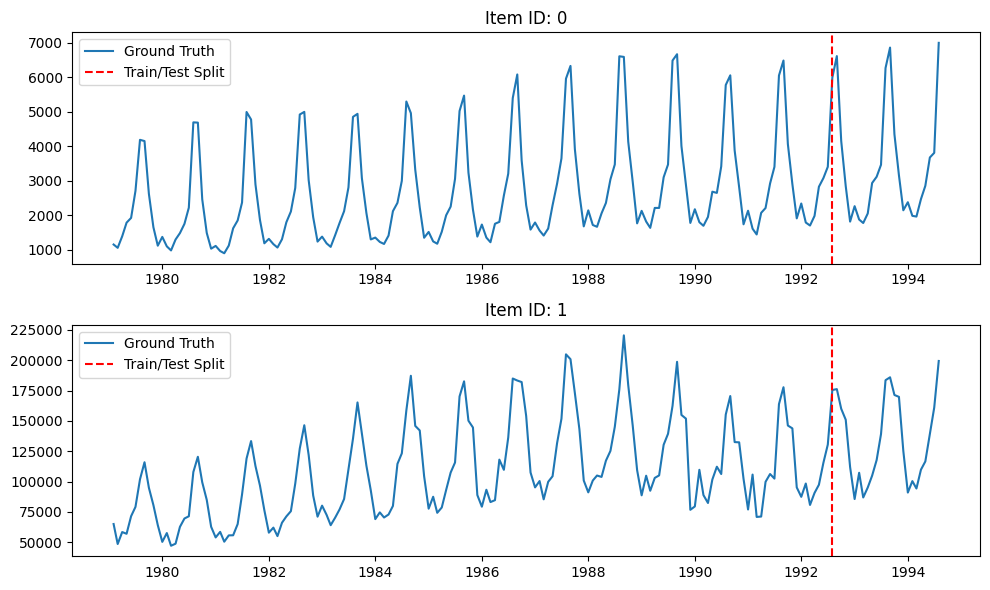

In [28]:
from tabpfn_time_series.plot import plot_actual_ts

plot_actual_ts(train_tsdf, test_tsdf_ground_truth)

In [29]:
train_tsdf

target
item_id timestamp              
0       1979-01-31    1149.8700
        1979-02-28    1053.8002
        1979-03-31    1388.8798
        1979-04-30    1783.3702
        1979-05-31    1921.0252
...                         ...
1       1992-03-31   90682.2100
        1992-04-30   97428.0100
        1992-05-31  115606.6000
        1992-06-30  130511.8000
        1992-07-31  175490.2000

[326 rows x 1 columns]

In [30]:
from tabpfn_time_series import FeatureTransformer
from tabpfn_time_series.features import (
    RunningIndexFeature,
    CalendarFeature,
    AutoSeasonalFeature,
)

selected_features = [
    RunningIndexFeature(),
    CalendarFeature(),
    AutoSeasonalFeature(),
]

feature_transformer = FeatureTransformer(selected_features)

train_tsdf, test_tsdf = feature_transformer.transform(train_tsdf, test_tsdf)

In [31]:
train_tsdf

target  running_index  year  second_of_minute_sin  \
item_id timestamp                                                            
0       1979-01-31    1149.8700              0  1979                   0.0   
        1979-02-28    1053.8002              1  1979                   0.0   
        1979-03-31    1388.8798              2  1979                   0.0   
        1979-04-30    1783.3702              3  1979                   0.0   
        1979-05-31    1921.0252              4  1979                   0.0   
...                         ...            ...   ...                   ...   
1       1992-03-31   90682.2100            158  1992                   0.0   
        1992-04-30   97428.0100            159  1992                   0.0   
        1992-05-31  115606.6000            160  1992                   0.0   
        1992-06-30  130511.8000            161  1992                   0.0   
        1992-07-31  175490.2000            162  1992                   0.0   

                    second_of_minute_cos  minute_of_hour_sin  \
item_id timestamp                                              
0       1979-01-31                   1.0                 0.0   
        1979-02-28                   1.0                 0.0   
        1979-03-31                   1.0                 0.0   
        1979-04-30                   1.0                 0.0   
        1979-05-31                   1.0                 0.0   
...                                  ...                 ...   
1       1992-03-31                   1.0                 0.0   
        1992-04-30                   1.0                 0.0   
        1992-05-31                   1.0                 0.0   
        1992-06-30                   1.0                 0.0   
        1992-07-31                   1.0                 0.0   

                    minute_of_hour_cos  hour_of_day_sin  hour_of_day_cos  \
item_id timestamp                                                          
0       1979-01-31                 1.0              0.0              1.0   
        1979-02-28                 1.0              0.0              1.0   
        1979-03-31                 1.0              0.0              1.0   
        1979-04-30                 1.0              0.0              1.0   
        1979-05-31                 1.0              0.0              1.0   
...                                ...              ...              ...   
1       1992-03-31                 1.0              0.0              1.0   
        1992-04-30                 1.0              0.0              1.0   
        1992-05-31                 1.0              0.0              1.0   
        1992-06-30                 1.0              0.0              1.0   
        1992-07-31                 1.0              0.0              1.0   

                    day_of_week_sin  ...        sin_#0        cos_#0  \
item_id timestamp                    ...                               
0       1979-01-31     8.660254e-01  ...  0.000000e+00  1.000000e+00   
        1979-02-28     8.660254e-01  ...  5.000000e-01  8.660254e-01   
        1979-03-31    -8.660254e-01  ...  8.660254e-01  5.000000e-01   
        1979-04-30     0.000000e+00  ...  1.000000e+00  6.123234e-17   
        1979-05-31     1.224647e-16  ...  8.660254e-01 -5.000000e-01   
...                             ...  ...           ...           ...   
1       1992-03-31     8.660254e-01  ...  8.660254e-01  5.000000e-01   
        1992-04-30     1.224647e-16  ...  1.000000e+00  1.468957e-15   
        1992-05-31    -2.449294e-16  ...  8.660254e-01 -5.000000e-01   
        1992-06-30     8.660254e-01  ...  5.000000e-01 -8.660254e-01   
        1992-07-31    -8.660254e-01  ...  6.859260e-15 -1.000000e+00   

                          sin_#1    cos_#1        sin_#2        cos_#2  \
item_id timestamp                                                        
0       1979-01-31  0.000000e+00  1.000000  0.000000e+00  1.000000e+00   
        1979-02-28  8.660254e